In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Creating Dataset

In [14]:
m = 1.2
c = 2

# Line points
X = np.array([i for i in range(-1, 50)])
Y_old = m * X + c
Y = np.random.normal(0, 3, X.shape[0]) + Y_old

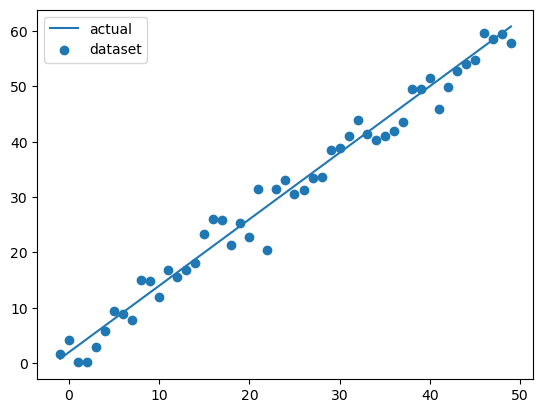

In [15]:
plt.plot(X, Y_old, label="actual")
plt.scatter(X, Y, label="dataset")
plt.legend()
plt.show()

# Implementing the model, loss function, and optimizer 

In [16]:
def model(X, w, b):
    #print("Hello")
    return X*w + b

In [17]:
def loss(w, b):
    mse = (1/Y.shape[0]) * np.sum((Y - model(X, w, b)) ** 2)
    return mse 

# Optimizer solution

In [31]:
def grad_desc(epoch=10, lr = 1):
    # Initialization
    w = 0.6
    b = 5
    losses = []
    ws = []
    prev_loss = 1e20
    
    # Epochs start
    for i in range(1, epoch):
        # Learning rate decay
        #if i % 5 == 0:
        #    lr = lr / 2
        
        new_loss = loss(w,b)
        
        #Early stopping
        if np.abs(new_loss - prev_loss) < 0.01:
           break
        prev_loss = new_loss
        
        
        # Calculate derivative against parameters
        dw = (1/Y.shape[0]) * np.sum(-2*X*(Y - model(X, w, b)))
        db = (1/Y.shape[0]) * np.sum(-2*(Y - model(X, w, b)))
        
        # Update parameters
        w = w - lr * dw
        b = b - lr * db
        
        print(i, ". Loss: ", loss(w, b), ", W: ", w, " ,b: ", b)
        
        losses.append(loss(w,b))
        ws.append(w)
        
        # Plot the lines
        Y_hat = w * X + b
        plt.plot(X, Y_hat, label="Epoch: "+str(i))
    
    plt.scatter(X, Y, label="dataset")
    plt.legend()
    plt.show()
    
    return w, b, ws, losses
        

1 . Loss:  75.8648039592726 , W:  1.3841796606617986  ,b:  5.022131212655224
2 . Loss:  32.08174925316832 , W:  0.9241108677469753  ,b:  5.006577539173372
3 . Loss:  17.004690340684917 , W:  1.1941510441935808  ,b:  5.013138275098394
4 . Loss:  11.811657854505466 , W:  1.0357726122557667  ,b:  5.00672396108213
5 . Loss:  10.021886982035905 , W:  1.1287846748228143  ,b:  5.007924640426913
6 . Loss:  9.403926180576732 , W:  1.0742839815916863  ,b:  5.004658339409788
7 . Loss:  9.189443912096873 , W:  1.1063418364784618  ,b:  5.004014604269792
8 . Loss:  9.113888899539136 , W:  1.087608204704789  ,b:  5.001833379565511
9 . Loss:  9.086171065569665 , W:  1.0986783226221177  ,b:  5.0005557316357745
10 . Loss:  9.074926348621943 , W:  1.0922599407018019  ,b:  4.998749273341866
11 . Loss:  9.069355499118423 , W:  1.0961035435839346  ,b:  4.997254510296719


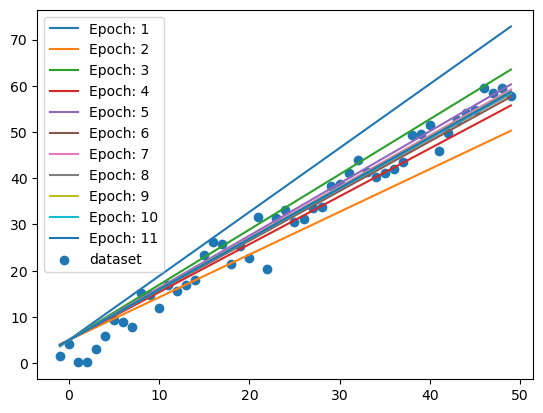

In [34]:
w, b, ws, losses = grad_desc(10000, 0.001)

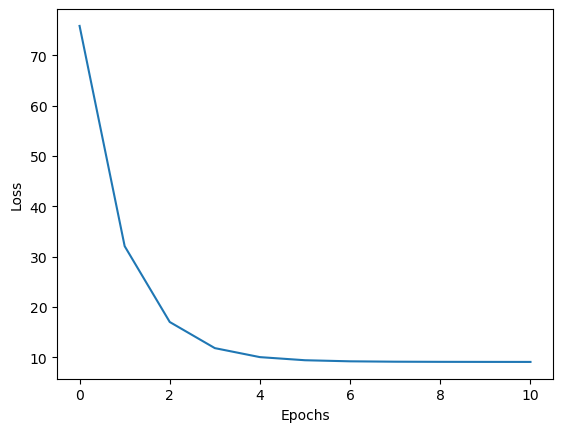

In [35]:
#plot loss
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

# Parameter update visualization

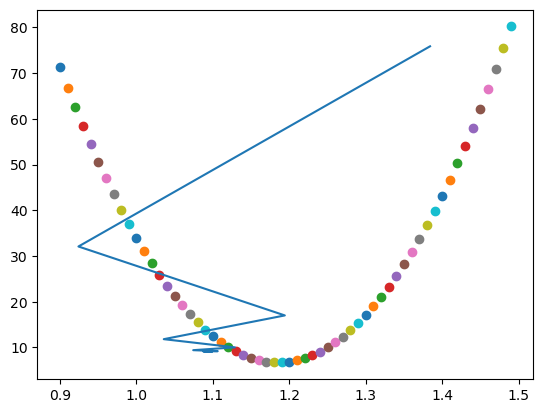

In [20]:
for i in range(90, 150):
    w = i / 100
    b = 2
    
    l = loss(w, b)
    plt.scatter(w, l)

#plt.plot([i/100 for i in range(90,150)], [10 for i in range(90,150)])

plt.plot(ws, losses)